In [1]:
import cv2, sys
import matplotlib.pyplot as plt
import numpy as np

image_general = cv2.imread("C:/opencv_practice/general/HF030002_0301_0079.jpg", cv2.IMREAD_UNCHANGED)
image_gray_general = cv2.imread("C:/opencv_practice/general/HF030002_0301_0079.jpg", cv2.IMREAD_GRAYSCALE)


image_general = cv2.resize(image_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
image_gray_general = cv2.resize(image_gray_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)



cv2.imshow('image', image_general)
cv2.imshow('image_gray', image_gray_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\jinsu\anaconda3\envs\project-env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jinsu\anaconda3\envs\project-env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\jinsu\anaconda3\envs\project-env\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
blur_general = cv2.GaussianBlur(image_gray_general, ksize=(7,7), sigmaX=3)
cv2.imshow('blur_general', blur_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
ret, thresh1 = cv2.threshold(blur_general, 40, 255, cv2.THRESH_BINARY)

cv2.imshow('thresh1', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
edged_general = cv2.Canny(thresh1, 10, 250)
cv2.imshow('edged_general', edged_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
contour_general = image_general.copy()

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)
cv2.imshow('closed_general', closed_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
# 초록색 선 생김

final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)    
cv2.imshow('final_result', final_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
len(contours)

23

In [9]:
contours_xy = np.array(contours)
contours_xy.shape

C:\Users\jinsu\anaconda3\envs\project-env\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(23,)

In [16]:
for i in range(len(contours_xy)):
    x_min, x_max = 0,0
    y_min, y_max = 0,0
    x_value = list()
    y_value = list()
    
    for j in range(len(contours_xy[i])):
        x_value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        y_value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        
    x_min = min(x_value)
    x_max = max(x_value)
    y_min = min(y_value)
    y_max = max(y_value)
    
    x = x_min
    y = y_min
    w = x_max-x_min
    h = y_max-y_min
    
    print(x,y,w,h)

    
    if w<100 or h<100:
        pass
    else:
        img_trim = image_general[y:y+h, x:x+w]
        cv2.imwrite("C:/new_image/general" + str(i+1) + ".jpg", img_trim)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


384 636 8 3
225 633 16 6
135 623 12 16
261 608 7 31
137 592 12 21
396 587 2 2
401 582 78 32
233 579 2 2
414 542 60 27
375 529 13 6
229 527 196 112
0 525 21 104
261 514 4 9
132 503 16 13
421 498 19 9
406 494 7 3
165 478 10 10
15 474 16 11
0 471 28 52
0 451 9 6
23 417 17 21
0 406 17 21
176 223 226 284


In [1]:
import os

In [2]:
import cv2, sys
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 여기서부터는 위에 있는 코드를 참고해 이미지를 한꺼번에 처리해보자
folder = "C:/opencv_practice/general"
for filename in os.listdir(folder):
    print(filename)

HF030002_0101_0321.JPG
HF030002_0101_0322.JPG
HF030002_0101_0323.JPG
HF030002_0101_0324.JPG
HF030002_0101_0325.JPG
HF030002_0101_0326.JPG
HF030002_0101_0327.JPG
HF030002_0101_0328.JPG
HF030002_0101_0329.JPG
HF030002_0101_0330.JPG
HF030002_0101_0331.JPG
HF030002_0101_0332.JPG
HF030002_0101_0333.JPG
HF030002_0101_0334.JPG
HF030002_0101_0335.JPG
HF030002_0101_0336.JPG
HF030002_0101_0337.JPG
HF030002_0101_0338.JPG
HF030002_0101_0339.JPG
HF030002_0101_0340.JPG
HF030002_0101_0341.JPG
HF030002_0101_0342.JPG
HF030002_0101_0343.JPG
HF030002_0101_0344.JPG
HF030002_0101_0345.JPG
HF030002_0101_0346.JPG
HF030002_0101_0347.JPG
HF030002_0101_0348.JPG
HF030002_0101_0349.JPG
HF030002_0101_0350.JPG
HF030002_0101_0351.JPG
HF030002_0101_0352.JPG
HF030002_0101_0353.JPG
HF030002_0101_0354.JPG
HF030002_0101_0355.JPG
HF030002_0101_0356.JPG
HF030002_0101_0357.JPG
HF030002_0101_0358.JPG
HF030002_0101_0359.JPG
HF030002_0101_0360.JPG
HF030002_0101_0361.JPG
HF030002_0101_0362.JPG
HF030002_0101_0363.JPG
HF030002_01

In [4]:
file_list = [x for x in os.listdir(folder)]

In [5]:
len(file_list)

522

In [6]:
import datetime
import time

In [7]:
basename = "general"
from tqdm import tqdm

for file in tqdm(file_list):
    image_general = cv2.imread("C:/opencv_practice/general/" + str(file), cv2.IMREAD_UNCHANGED)
    image_gray_general = cv2.imread("C:/opencv_practice/general/" + str(file), cv2.IMREAD_GRAYSCALE)
    
    image_general = cv2.resize(image_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
    image_gray_general = cv2.resize(image_gray_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
    
    blur_general = cv2.GaussianBlur(image_gray_general, ksize=(7,7), sigmaX=3)
    ret, thresh1 = cv2.threshold(blur_general, 40, 255, cv2.THRESH_BINARY)
    edged_general = cv2.Canny(thresh1, 10, 250)
    contour_general = image_general.copy()
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)
    
    contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)
    
    contours_xy = np.array(contours)
    
    for i in range(len(contours_xy)):
        x_min, x_max = 0,0
        y_min, y_max = 0,0
        x_value = list()
        y_value = list()

        for j in range(len(contours_xy[i])):
            x_value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
            y_value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값

        x_min = min(x_value)
        x_max = max(x_value)
        y_min = min(y_value)
        y_max = max(y_value)

        x = x_min
        y = y_min
        w = x_max-x_min
        h = y_max-y_min


        if w<50 or h<50:
            pass
        else:
            img_trim = image_general[y:y+h, x:x+w]
            img_trim = cv2.resize(img_trim, dsize=(480, 640), interpolation=cv2.INTER_AREA)
            suffix = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
            filename = "_".join([basename, suffix])
            time.sleep(0.5)
            cv2.imwrite("C:/new_image/" + filename + ".JPG", img_trim)


    

  0%|                                                                                          | 0/522 [00:00<?, ?it/s]<ipython-input-7-2740fbe389ff>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  contours_xy = np.array(contours)
100%|████████████████████████████████████████████████████████████████████████████████| 522/522 [11:07<00:00,  1.28s/it]


In [59]:
image_general = cv2.imread("C:/opencv_practice/warrior/images66.jpg", cv2.IMREAD_UNCHANGED)
image_gray_general = cv2.imread("C:/opencv_practice/warrior/images66.jpg", cv2.IMREAD_GRAYSCALE)

image_general = cv2.resize(image_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
image_gray_general = cv2.resize(image_gray_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)

cv2.imshow('image', image_general)
cv2.imshow('image_gray', image_gray_general)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [64]:
blur_general = cv2.GaussianBlur(image_gray_general, ksize=(5,5), sigmaX=1)
ret, thresh1 = cv2.threshold(blur_general, 120, 255, cv2.THRESH_BINARY)

cv2.imshow('thresh1', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [65]:
edged_general = cv2.Canny(thresh1, 10, 250)
contour_general = image_general.copy()

cv2.imshow('edged_general', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)

contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)

cv2.imshow('final_result', final_result)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [33]:
len(contours)

34

In [119]:
# 이순신 장군 코드를 참고해서 한꺼번애 끝낸다

folder = "C:/opencv_practice/warrior"
basename = "warrior" 
file_list = [x for x in os.listdir(folder)]
    

for file in tqdm(file_list):
    image_general = cv2.imread("C:/opencv_practice/warrior/" + str(file), cv2.IMREAD_UNCHANGED)
    image_gray_general = cv2.imread("C:/opencv_practice/warrior/" + str(file), cv2.IMREAD_GRAYSCALE)
    
    image_general = cv2.resize(image_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
    image_gray_general = cv2.resize(image_gray_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
    
    blur_general = cv2.GaussianBlur(image_gray_general, ksize=(5,5), sigmaX=1)
    ret, thresh1 = cv2.threshold(blur_general, 120, 255, cv2.THRESH_BINARY)
    edged_general = cv2.Canny(thresh1, 10, 250)
    contour_general = image_general.copy()
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)
    
    contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)
    
    contours_xy = np.array(contours)
    
    for i in range(len(contours_xy)):
        x_min, x_max = 0,0
        y_min, y_max = 0,0
        x_value = list()
        y_value = list()

        for j in range(len(contours_xy[i])):
            x_value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
            y_value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값

        x_min = min(x_value)
        x_max = max(x_value)
        y_min = min(y_value)
        y_max = max(y_value)

        x = x_min
        y = y_min
        w = x_max-x_min
        h = y_max-y_min


        if w<50 or h<50:
            pass
        else:
            img_trim = image_general[y:y+h, x:x+w]
            img_trim = cv2.resize(img_trim, dsize=(480, 640), interpolation=cv2.INTER_AREA)
            suffix = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
            filename = "_".join([basename, suffix])
            time.sleep(0.5)
            cv2.imwrite("C:/new_warrior/" + filename + ".jpg", img_trim)


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]<ipython-input-119-b12c8d09febe>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  contours_xy = np.array(contours)
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [26:46<00:00,  1.61s/it]


In [110]:
image_general = cv2.imread("C:/opencv_practice/god/god (988).jpg", cv2.IMREAD_UNCHANGED)
image_gray_general = cv2.imread("C:/opencv_practice/god/god (988).jpg", cv2.IMREAD_GRAYSCALE)

image_general = cv2.resize(image_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
image_gray_general = cv2.resize(image_gray_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)

cv2.imshow('image', image_general)
cv2.imshow('image_gray', image_gray_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [112]:
blur_general = cv2.GaussianBlur(image_gray_general, ksize=(11,11), sigmaX=2)
ret, thresh1 = cv2.threshold(blur_general, 70, 255, cv2.THRESH_BINARY)

cv2.imshow('thresh1', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [115]:
edged_general = cv2.Canny(thresh1, 10, 250)
contour_general = image_general.copy()

cv2.imshow('edged_general', edged_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [116]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)

contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)

cv2.imshow('final_result', final_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [118]:
folder = "C:/opencv_practice/god"
    
file_list = [x for x in os.listdir(folder)]
basename = "god"

for file in tqdm(file_list):
    image_general = cv2.imread("C:/opencv_practice/god/" + str(file), cv2.IMREAD_UNCHANGED)
    image_gray_general = cv2.imread("C:/opencv_practice/god/" + str(file), cv2.IMREAD_GRAYSCALE)
    
    image_general = cv2.resize(image_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
    image_gray_general = cv2.resize(image_gray_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
    
    blur_general = cv2.GaussianBlur(image_gray_general, ksize=(11,11), sigmaX=2)
    ret, thresh1 = cv2.threshold(blur_general, 70, 255, cv2.THRESH_BINARY)
    edged_general = cv2.Canny(thresh1, 10, 250)
    contour_general = image_general.copy()
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)
    
    contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)
    
    contours_xy = np.array(contours)
    
    for i in range(len(contours_xy)):
        x_min, x_max = 0,0
        y_min, y_max = 0,0
        x_value = list()
        y_value = list()

        for j in range(len(contours_xy[i])):
            x_value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
            y_value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값

        x_min = min(x_value)
        x_max = max(x_value)
        y_min = min(y_value)
        y_max = max(y_value)

        x = x_min
        y = y_min
        w = x_max-x_min
        h = y_max-y_min


        if w<50 or h<50:
            pass
        else:
            img_trim = image_general[y:y+h, x:x+w]
            img_trim = cv2.resize(img_trim, dsize=(480, 640), interpolation=cv2.INTER_AREA)
            suffix = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
            filename = "_".join([basename, suffix])
            time.sleep(0.5)
            cv2.imwrite("C:/new_god/" + filename + ".jpg", img_trim)

  0%|                                                                                         | 0/1003 [00:00<?, ?it/s]<ipython-input-118-6e49aefceda9>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  contours_xy = np.array(contours)
100%|██████████████████████████████████████████████████████████████████████████████| 1003/1003 [18:10<00:00,  1.09s/it]


In [121]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [161]:
b_size=5

In [193]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('C:/image/train/',target_size=(480,640),
                                                    batch_size=b_size, class_mode='categorical')

Found 2250 images belonging to 3 classes.


In [194]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('C:/image/test/',target_size=(480,640),
                                                    batch_size=b_size, class_mode='categorical')

Found 750 images belonging to 3 classes.


In [210]:
model = Sequential()
model.add(Conv2D(15, (3, 3), input_shape=(480,640,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(15, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [211]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 478, 638, 15)      420       
_________________________________________________________________
activation_75 (Activation)   (None, 478, 638, 15)      0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 239, 319, 15)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 237, 317, 15)      2040      
_________________________________________________________________
activation_76 (Activation)   (None, 237, 317, 15)      0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 118, 158, 15)      0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 116, 156, 30)    

In [212]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0002),\
              metrics=['accuracy'])

In [213]:
steps_train = len(train_generator)
steps_test = len(test_generator)

In [214]:
history = model.fit(
       train_generator,
       steps_per_epoch=steps_train,
       epochs=20,
       validation_data=test_generator,
       validation_steps=steps_test )

Epoch 1/20
450/450 [==============================] - 352s 782ms/step - loss: 0.7133 - accuracy: 0.5978 - val_loss: 0.4200 - val_accuracy: 0.6667
Epoch 2/20
450/450 [==============================] - 348s 773ms/step - loss: 0.5037 - accuracy: 0.7458 - val_loss: 0.3189 - val_accuracy: 0.8080
Epoch 3/20
450/450 [==============================] - 362s 804ms/step - loss: 0.4516 - accuracy: 0.8182 - val_loss: 0.2512 - val_accuracy: 0.9040
Epoch 4/20
450/450 [==============================] - 325s 723ms/step - loss: 0.4170 - accuracy: 0.8280 - val_loss: 0.3298 - val_accuracy: 0.9040
Epoch 5/20
450/450 [==============================] - 308s 684ms/step - loss: 0.4089 - accuracy: 0.8160 - val_loss: 0.3392 - val_accuracy: 0.8853
Epoch 6/20
450/450 [==============================] - 304s 676ms/step - loss: 0.3806 - accuracy: 0.8191 - val_loss: 0.3062 - val_accuracy: 0.8987
Epoch 7/20
450/450 [==============================] - 305s 677ms/step - loss: 0.3509 - accuracy: 0.8316 - val_loss: 0.6737 -

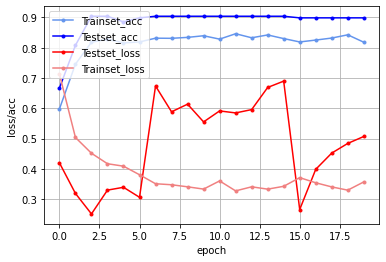

In [215]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='cornflowerblue', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='blue', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='lightcoral', label='Trainset_loss')

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()